In [1]:
import posydon
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
os.environ['MSG_DIR'] = '/home/kasdaglie/blue/kasdaglie/msg-1.2'
import matplotlib.patches as mpatches
from generate_spectra import population_spectra
from generate_cmds import population_cmd
from spectral_tools import population_data
%matplotlib inline
plt.rcParams.update({'font.size': 16})
import astropy.constants as con
import astropy.units as unt
kpc = 3.08e19*unt.m

In [2]:
file = "/home/kasdaglie/blue/kasdaglie/POSYDON_TRIAL/posydon_run_50/population_100.h5"
pop_kwargs = dict( 
    time = 1.0e8,
    metallicity = 1.0,
    scaling_factor = 1*kpc
)
pop = population_spectra(file,**pop_kwargs)

Total time is:  0:00:06.107385


In [11]:
st = datetime.datetime.now()
spectra , lam_c =  pop.create_spectrum_population()
et = datetime.datetime.now()
elapsed_time = et - st 
print('Execution time: ', elapsed_time, 'seconds')


Execution time:  0:00:11.027029 seconds


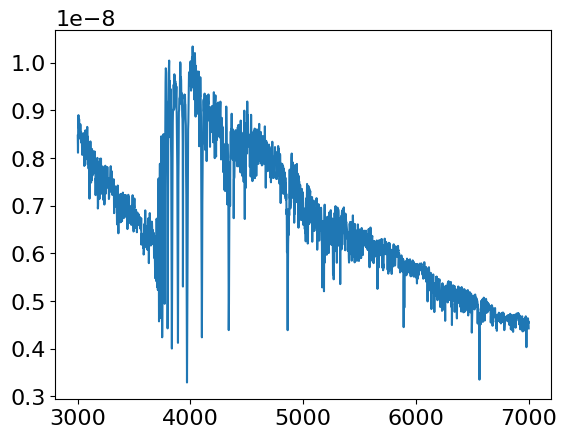

In [12]:
plt.plot(lam_c,spectra)

In [3]:
x = {'Teff':20000 ,'log(g)': 4.1,'[Fe/H]': 0,'Z/Zo':1}
pop.grids.photogrid_flux('secondary_grid',10e-9,**x)

{'U': 1644290389.957219, 'B': 688035373.8568047, 'V': 575954465.0107982}

In [3]:
cmd = population_cmd(file,**pop_kwargs)

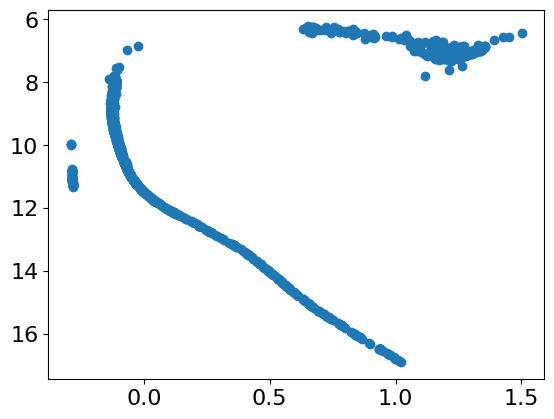

In [8]:
B_V,V,L = cmd.population_mag(3000)
plt.gca().invert_yaxis()
plt.scatter(B_V,V)